# Bonner-Ebert sphere numerical solution

This demonstrates the `BE_sphere.py` package, which is used in a similar way in the `5b` assignment

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from BE_sphere import BE_sphere
from scaling   import scaling, CGS
from HD        import HD

### Initialize and plot in physical units

using CGS units
{'system': <class 'scaling.CGS'>, 'l': 2.996e+17, 'm': 1.989e+33, 't': 2996000000000.0, 'D': 7.396212086078283e-20, 'v': 100000.0, 'P': 7.396212086078283e-10, 'e': 1.989e+43, 'E': 7.396212086078283e-10, 'mu': 2.4, 'T': 290.7394799739262, 'G': 0.04430105807743658, 'Stefan': 5477979.176931791, 'h_P': 1.1119233219288195e-82, 'k_B': 2.018220211161387e-57, 'c': 299790.0}
BE_sphere: m_solar, gamma, T_K= 1.0 1.0001 10.0


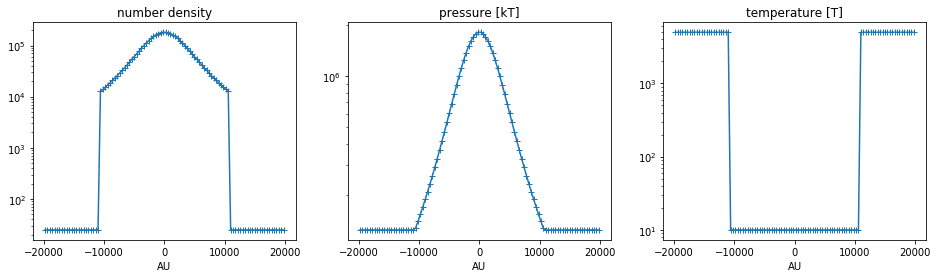

In [2]:
class BE_experiment(HD):
    def __init__(u, units, verbose=0, **kwargs):
        HD.__init__(u,**kwargs)
        u.units = units
        BE_sphere(u, verbose=verbose)

units = scaling (l=2e4*CGS.AU, v=CGS.kms, m=CGS.m_Sun, verbose=2)
u = BE_experiment (units, n=100, gamma=1.01, verbose=0)

P = u.E*(u.gamma-1.0)*u.units.P
T = u.T*u.units.T
N = u.D*u.units.D/(u.units.mu*CGS.m_u)
P = P/CGS.k_B

plt.figure(figsize=(16,4))
m = u.n[0]//2
x = u.x*u.units.l/CGS.AU
plt.subplot(1,3,1); plt.semilogy(x,N[:,m,m],'-+'); plt.xlabel('AU'); plt.title('number density');        
plt.subplot(1,3,2); plt.semilogy(x,P[:,m,m],'-+'); plt.xlabel('AU'); plt.title('pressure [kT]');
plt.subplot(1,3,3); plt.semilogy(x,T[:,m,m],'-+'); plt.xlabel('AU'); plt.title('temperature [T]');

### Print BE parameters and scaling constants

In [3]:
T_BE= 10./u.units.T
c_BE = (T_BE)**0.5
c_BE_CGS = c_BE*u.units.v
x_BE = 6.5
M_BE = 1.0
D_0=(1.18*c_BE**3)**2/(M_BE**2*u.units.G**3)
D_0_CGS=(1.18*c_BE_CGS**3)**2/((M_BE*CGS.m_Sun)**2*CGS.G**3)
y_BE=14.1
D_c=D_0*y_BE
D_c_CGS=D_0_CGS*y_BE
R_BE=x_BE/(4.*np.pi)**0.5*c_BE/(u.units.G*D_c)**0.5
R_BE_CGS=x_BE/(4.*np.pi)**0.5*c_BE*u.units.v/(CGS.G*D_c*u.units.D)**0.5
print('Unit of density          : {:.2e}'.format(u.units.D))
print('Unit of H-number density : {:.2e}'.format(u.units.D/(u.units.mu*CGS.m_u)))
print('Unit of temperature      : {:.2e}'.format(u.units.T))
print('Cold ISM temperature     : {:.2e}'.format(T_BE*u.units.T))
print('Cold ISM sound speed     : {:.2e}'.format(c_BE*u.units.v))
print('BE radius                : {:.2e}'.format(R_BE))
print('BE radius (AU)           : {:.2e}'.format(R_BE_CGS/CGS.AU))
print('BE central density       : {:.2e}'.format(D_c))

Unit of density          : 7.40e-20
Unit of H-number density : 1.84e+04
Unit of temperature      : 2.91e+02
Cold ISM temperature     : 1.00e+01
Cold ISM sound speed     : 1.85e+04
BE radius                : 5.33e-01
BE radius (AU)           : 1.07e+04
BE central density       : 9.19e+00
